In [301]:
import pandas as pd
import  numpy as np
import math

train  = pd.read_csv("train.csv", encoding="big5",header=None)
test   = pd.read_csv("test.csv", encoding="big5" ,header=None)
####take out pm25
train_unmodify_pm25=[]
index = 10
mean_of_all_data=0 
for i in range (12):
    train_unmodify_pm25.append([])
    for j in range (20):
        for k in range (3,27):
            train_unmodify_pm25[i].append(float(train[k][index]))
            mean_of_all_data+=int(train[k][index])
        index+=18
###remove bad feat <0 or >100
mean_of_all_data/=5760
for i in range (12):
    for j in range (480):
        if(train_unmodify_pm25[i][j]<0 or train_unmodify_pm25[i][j]>100):
            train_unmodify_pm25[i][j]=mean_of_all_data
######remove done
###create label and feature 
train_feat=[]
train_label=[]
for i in range (12):
    for j in range (471):
        temp_mean=0
        for m in range (j,j+9):
            temp_mean+=train_unmodify_pm25[i][m]
        temp_mean/=9
        train_feat.append(temp_mean)
        train_label.append(train_unmodify_pm25[i][j+9])
######create train feat label done


In [326]:
def gd (num_data,w,b,lr_w,lr_b):
    global train_label,train_feat
    loss_square=0
    loss=0
    w_next=0
    b_next=0
    for i in range (num_data,num_data+5000):
        y=w*train_feat[i]+b
        loss+=((y-train_label[i])*(y-train_label[i]))
        w_next+=2*(train_label[i]-y)*(-train_label[i])
        b_next+=2*(train_label[i]-y)*(-1)
    loss_square=math.sqrt(loss/5000)
    w_next=w_next*(-1)*lr_w+w
    b_next=b_next*(-1)*lr_b+b
    lr_w/=1
    lr_b/=1
    return loss,w_next,b_next,lr_w,lr_b,loss_square

def validation (w,b):
    global train_label,train_feat
    loss=0
    for i in range (5001,5652):
        y=w*train_feat[i]+b
        loss+=((y-train_label[i])*(y-train_label[i]))
    loss=math.sqrt(loss/651)
    return loss

def create_test_submission(w,b):
    global train_label,train_feat


    test_feat= []
    test_label=[]
    test_title =[]
    row=9
    for i in range(260):
        pm25_mean=0
        for j in range(2,11):
            pm25_mean+=float(test[j][row])
            test_feat.append(pm25_mean/9)
        row+=18
    test_title.append("id")
    test_label.append("value")
    for i in range (260):
        test_title.append("id_"+str(i))
        test_label.append(test_feat[i]*w+b)

    df =pd.DataFrame(test_label,test_title)
    df.to_csv("my_submission.csv",header=False)

14.85079727404238 1.0791602076592715 0.6633167456999451 11.684438907376455


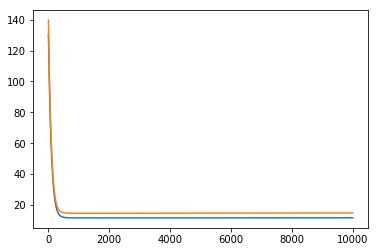

In [333]:
import matplotlib.pyplot as plt
loss_list=[]
validation_list=[]


(l,w,b,lw,lb)=(0,5,5,0.000000001,0.00000001)
for i in range (10000):
    ls=0
    w_total=0
    b_total=0
    for j in range(1):
        (l,w,b,lw,lb,loss_square)=gd(j,w,b,lw,lb)
        w_total+=w
        b_total+=b
        ls+=loss_square
    w_total/=1
    b_total/=1
    ls/=1
    w=w_total
    b=b_total
    validation_list.append(validation (w,b))
    loss_list.append(ls)
plt.plot(loss_list)
plt.plot(validation_list)
plt.savefig('loss.jpg')
print (validation (w,b),w,b,ls)
create_test_submission(w,b)